In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model 
from sklearn.preprocessing import scale
import sklearn.neighbors

In [2]:
# LOAD DATA
cols = ['Country', 'Value']
satisfaction = pd.read_csv("~/Software_training/oreilly_handson/datasets/life_satisfaction.csv", thousands=',', usecols=cols)
wealth = pd.read_csv("~/Software_training/oreilly_handson/datasets/net_wealth.csv", thousands=',', usecols=cols)


satisfaction = satisfaction.values.tolist()
wealth = wealth.values.tolist()

In [88]:
y = []
for n, i in enumerate(satisfaction):
    if satisfaction[n][0] in [x[0] for x in wealth]:
        y.append(satisfaction[n][1])

y = np.array(y)
X = np.array([int(x[1]) for x in wealth]).reshape(-1, 1)
print(len(y))
print(len(X))

28
28


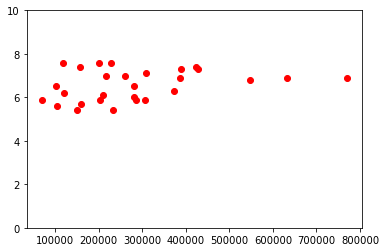

In [89]:
plt.plot(X, y, 'ro')
plt.ylim([0,10])
plt.show()

In [90]:
l_reg = sklearn.linear_model.LinearRegression()
l_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [91]:
print(l_reg.score(X,y))

0.09673581866921444


In [92]:
print('Coefficients: \n', l_reg.coef_)


Coefficients: 
 [1.33454687e-06]


In [93]:
#X = scale(X)
#l_reg = sklearn.linear_model.LinearRegression()
#l_reg.fit(X,y)
#print(l_reg.score(X,y))

In [94]:
y_pred = l_reg.predict(X)

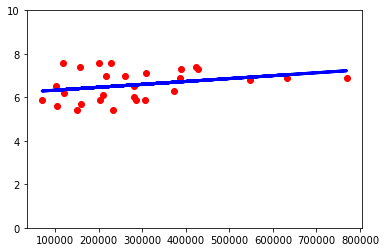

In [95]:
plt.plot(X, y, 'ro')
plt.plot(X, y_pred, color='blue', linewidth=3)
plt.ylim([0,10])
plt.show()

In [102]:
X_new = [[22587]] # cyprus
print(X_new)
print(l_reg.predict(X_new))

[[22587]]
[6.22652479]


In [103]:
neigh = sklearn.neighbors.KNeighborsRegressor()
neigh.fit(X,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [104]:
print(neigh.score(X,y))

0.027225782823658506


In [105]:
y_pred = neigh.predict(X)

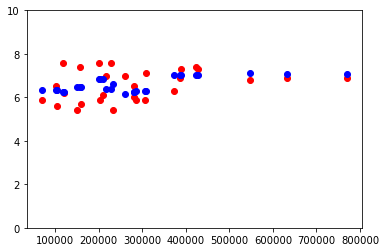

In [106]:
plt.plot(X, y, 'ro')
plt.plot(X, y_pred, 'bo')
plt.ylim([0,10])
plt.show()

In [107]:
print(neigh.predict(X_new))

[6.36]


In [ ]:
# the satisfaction prediciton 
# 6.36 for the k nearest neighbour
# 6.22 prediction for the linear regression